In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("C:/Users/Dell/OneDrive/Desktop/competitons/Worksheet in 6796bd2167e3d_HexaMart_Case.csv", encoding= "ISO-8859-1")

In [3]:
data.head()

,Customer ID,Quantity,Order ID,Region,Customer Type,Payment Method,Date of Order,City,Product Line,Unit Price,Total Sales,Profit
0,40333,38,SCHE-867,South India,Pro,Credit Card,29-11-2015,Chennai,Home Décor,9361,355718,38096.5
1,18111,41,NDEL-5690,North India,Pro,Net Banking,12-11-2016,Delhi,Education,7987,327467,-13472.7
2,37699,1,WPAN-3389,West India,Regular,Net Banking,08-01-2015,Panaji,Kitchen Appliances,8753,8753,842.6
3,36722,24,ERAN-8249,East India,Regular,Net Banking,01-01-2017,Ranchi,Skincare,4424,106176,13178.4
4,21943,18,NDEH-1618,North India,Regular,Credit Card,23-04-2018,Dehradun,Education,5048,90864,-1659.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     3908 non-null   int64  
 1   Quantity        3908 non-null   int64  
 2   Order ID        3908 non-null   object 
 3   Region          3908 non-null   object 
 4   Customer Type   3908 non-null   object 
 5   Payment Method  3908 non-null   object 
 6   Date of Order   3908 non-null   object 
 7   City            3908 non-null   object 
 8   Product Line    3908 non-null   object 
 9   Unit Price      3908 non-null   int64  
 10  Total Sales     3908 non-null   int64  
 11  Profit          3908 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 366.5+ KB


In [5]:
data['Date of Order']= pd.to_datetime(data['Date of Order'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_8012\303380819.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date of Order']= pd.to_datetime(data['Date of Order'])


In [6]:
data= data.sort_values(by= "Date of Order", ascending= True)

In [7]:
data.head()

,Customer ID,Quantity,Order ID,Region,Customer Type,Payment Method,Date of Order,City,Product Line,Unit Price,Total Sales,Profit
1677,35468,12,EBHU-1050,East India,Pro,Credit Card,2014-08-02,Bhubaneswar,Food and Beverages,6883,82596,-3204.2
1628,17344,21,EPAT-1531,East India,Regular,Net Banking,2014-08-03,Patna,Technology,7375,154875,5615.9
749,40737,36,EKOL-3117,East India,Trial,Credit Card,2014-08-04,Kolkata,Home Décor,1658,59688,10139.3
3292,45479,24,SCHE-5124,South India,Pro,Debit Card,2014-08-04,Chennai,Home Décor,8262,198288,28575.5
1029,26617,27,NDEH-8725,North India,Regular,UPI,2014-08-05,Dehradun,Education,4346,117342,22342.5


In [8]:
df= data[['Date of Order', 'Total Sales']]
df.set_index('Date of Order', inplace= True)

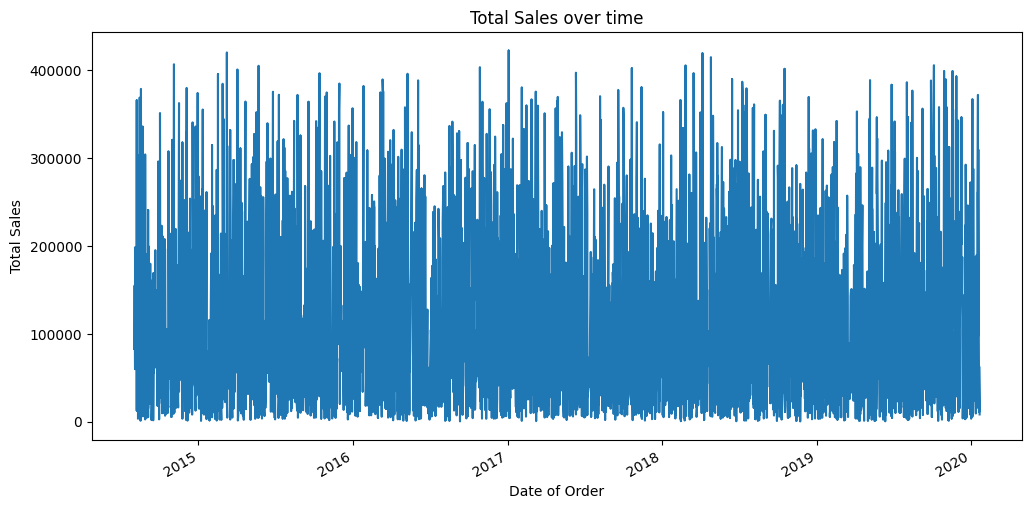

In [9]:
plt.figure(figsize=(12,6))
df['Total Sales'].plot()
plt.xlabel('Date of Order')
plt.ylabel('Total Sales')
plt.title('Total Sales over time')
plt.show()

In [10]:
df['Total Sales (Smoothed)'] = df['Total Sales'].rolling(window=7, min_periods=1).mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8012\3802359459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sales (Smoothed)'] = df['Total Sales'].rolling(window=7, min_periods=1).mean()


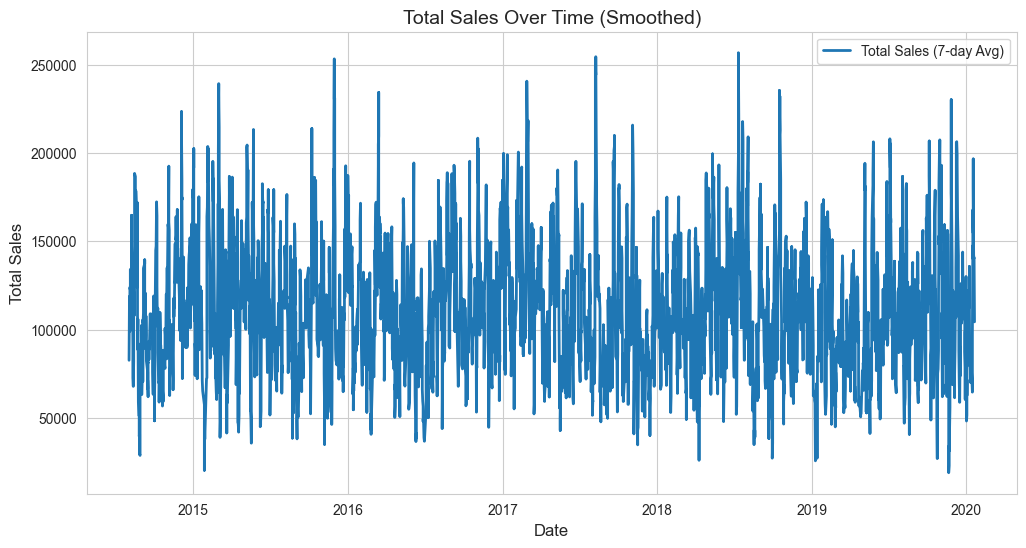

In [11]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(df.index, df['Total Sales (Smoothed)'], linewidth=2, label="Total Sales (7-day Avg)")

# Formatting
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales Over Time (Smoothed)", fontsize=14)
plt.legend()
plt.grid(True)

plt.show()

<Axes: xlabel='Date of Order'>

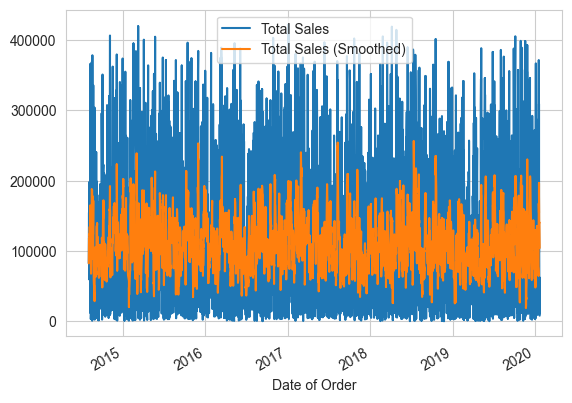

In [12]:
df.plot()

In [13]:
df.head()

,Total Sales,Total Sales (Smoothed)
Date of Order,,
2014-08-02,82596,82596.00
2014-08-03,154875,118735.50
2014-08-04,59688,99053.00
2014-08-04,198288,123861.75
2014-08-05,117342,122557.80


In [14]:
df.reset_index(inplace= True)

In [15]:
df.head()

,Date of Order,Total Sales,Total Sales (Smoothed)
0,2014-08-02,82596,82596.00
1,2014-08-03,154875,118735.50
2,2014-08-04,59688,99053.00
3,2014-08-04,198288,123861.75
4,2014-08-05,117342,122557.80


In [16]:
df1= df[['Date of Order', 'Total Sales (Smoothed)']]

In [17]:
df1.head()

,Date of Order,Total Sales (Smoothed)
0,2014-08-02,82596.00
1,2014-08-03,118735.50
2,2014-08-04,99053.00
3,2014-08-04,123861.75
4,2014-08-05,122557.80


In [18]:
df1['Total Sales (Smoothed)']= np.log(df1['Total Sales (Smoothed)'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_8012\1034151119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total Sales (Smoothed)']= np.log(df1['Total Sales (Smoothed)'])


<Axes: >

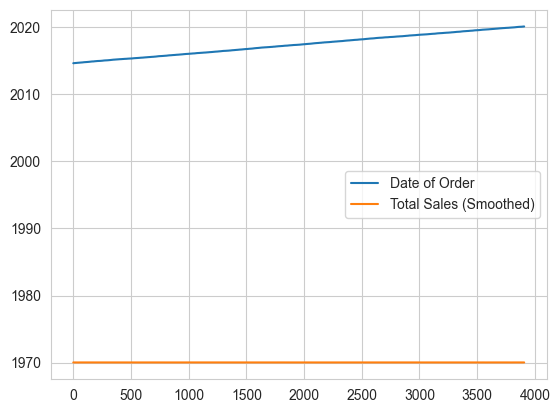

In [19]:
df1.plot()

In [20]:
df2= df1['Total Sales (Smoothed)']

<Axes: >

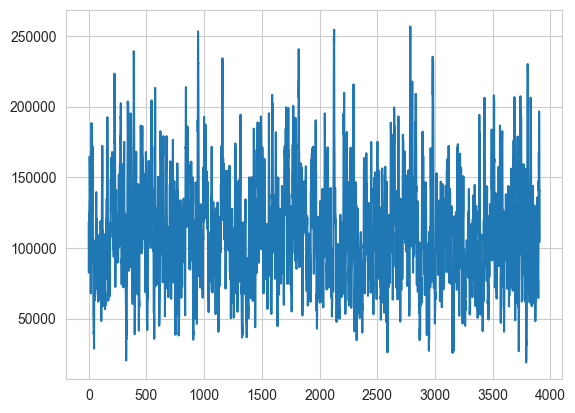

In [21]:
df['Total Sales (Smoothed)'].plot()

<Axes: >

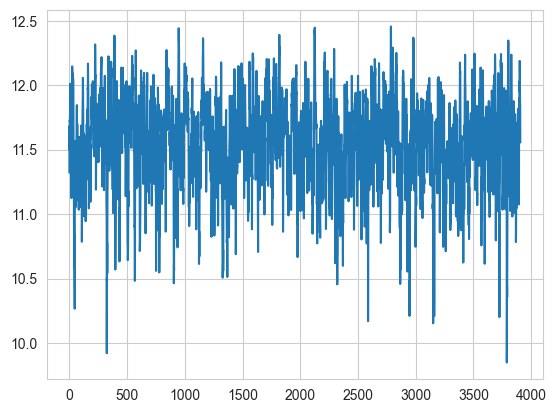

In [22]:
df2.plot()

In [23]:
df2.head()

0    11.321717
1    11.684654
2    11.503410
3    11.726921
4    11.716338
Name: Total Sales (Smoothed), dtype: float64

In [24]:
df1.head()

,Date of Order,Total Sales (Smoothed)
0,2014-08-02,11.321717
1,2014-08-03,11.684654
2,2014-08-04,11.503410
3,2014-08-04,11.726921
4,2014-08-05,11.716338


In [25]:
df2 = df2.dropna()
df2= pd.to_numeric(df2)
print(df2.dtypes)

float64


In [27]:
print(df2.dtypes)

float64


In [32]:
df2= df2.to_frame()

In [34]:
df2.columns

Index(['Total Sales (Smoothed)'], dtype='object')

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 0 to MA_Smoothed
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Total Sales (Smoothed)  3909 non-null   object
dtypes: object(1)
memory usage: 190.1+ KB


In [39]:
df2["Total Sales (Smoothed)"] = pd.to_numeric(df2["Total Sales (Smoothed)"], errors='coerce')

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 0 to MA_Smoothed
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Sales (Smoothed)  3908 non-null   float64
 1   MA_Smoothed             3859 non-null   float64
dtypes: float64(2)
memory usage: 220.7+ KB


In [64]:
df2= df2.dropna()
df2= df2.sort_index()

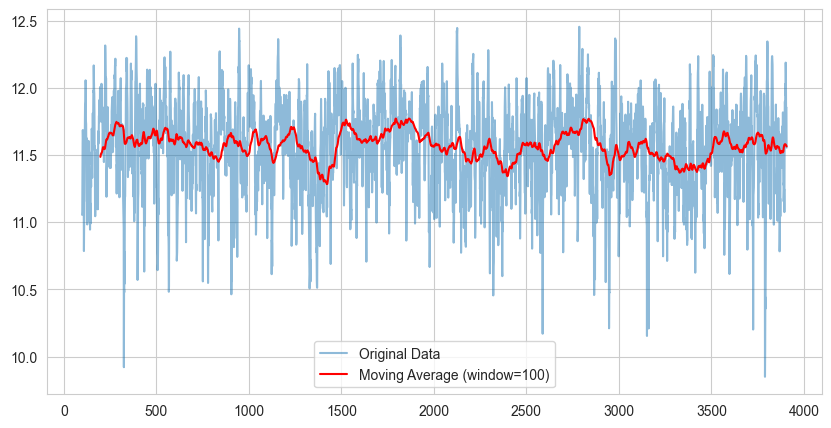

In [122]:
window_size = 100

df2 = df2.copy()  # Avoids SettingWithCopyWarning
df2['MA_Smoothed'] = df2['Total Sales (Smoothed)'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 5))

# Plot the original data (assuming 'Total Sales (Smoothed)' is the column name)
plt.plot(df2.index, df2['Total Sales (Smoothed)'], label="Original Data", alpha=0.5)

# Plot the moving average
plt.plot(df2.index, df2['MA_Smoothed'], label=f"Moving Average (window={window_size})", color='red')

plt.legend()
plt.show()


In [123]:
df3= df2['MA_Smoothed']

In [124]:
df3.info()

<class 'pandas.core.series.Series'>
Index: 3810 entries, 98 to 3907
Series name: MA_Smoothed
Non-Null Count  Dtype  
--------------  -----  
3711 non-null   float64
dtypes: float64(1)
memory usage: 188.6+ KB


In [125]:
df3= df3.dropna()

In [126]:
msk= (df3.index< len(df1)-400)
df3_train= df3[msk].copy()
df3_test= df3[~msk].copy()

In [127]:
df3_train.info()

<class 'pandas.core.series.Series'>
Index: 3311 entries, 197 to 3507
Series name: MA_Smoothed
Non-Null Count  Dtype  
--------------  -----  
3311 non-null   float64
dtypes: float64(1)
memory usage: 51.7+ KB


In [128]:
df3_test.info()

<class 'pandas.core.series.Series'>
Index: 400 entries, 3508 to 3907
Series name: MA_Smoothed
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 6.2+ KB


In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

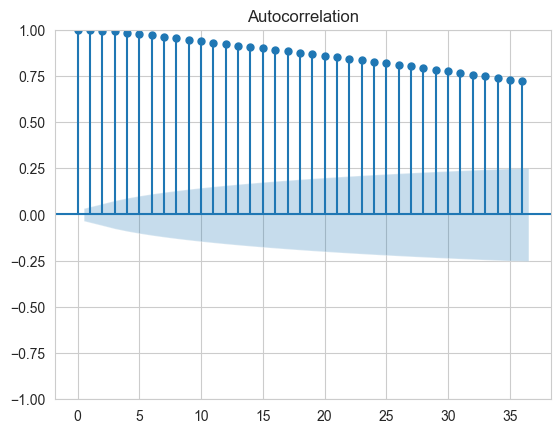

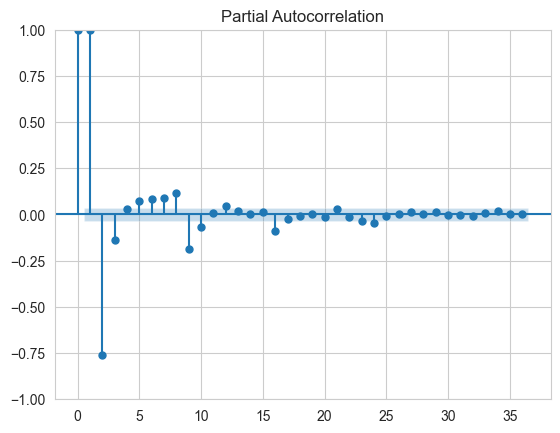

In [130]:
acf_original= plot_acf(df3_train)
pacf_original= plot_pacf(df3_train)

In [131]:
from statsmodels.tsa.stattools import adfuller
adf_fuller= adfuller(df3_train)
print(f'p-value: {adf_fuller[1]}')

p-value: 0.0007030114190229874


In [132]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(df3_train, order= (1,1,0))
model_fit= model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            MA_Smoothed   No. Observations:                 3311
Model:                 ARIMA(1, 1, 0)   Log Likelihood               14973.449
Date:                Sat, 08 Feb 2025   AIC                         -29942.897
Time:                        16:00:21   BIC                         -29930.688
Sample:                    01-01-1970   HQIC                        -29938.528
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8379      0.008     98.839      0.000       0.821       0.855
sigma2      6.885e-06   1.34e-07     51.226      0.000    6.62e-06    7.15e-06
Ljung-Box (L1) (Q):                   0.39   Jarque-

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


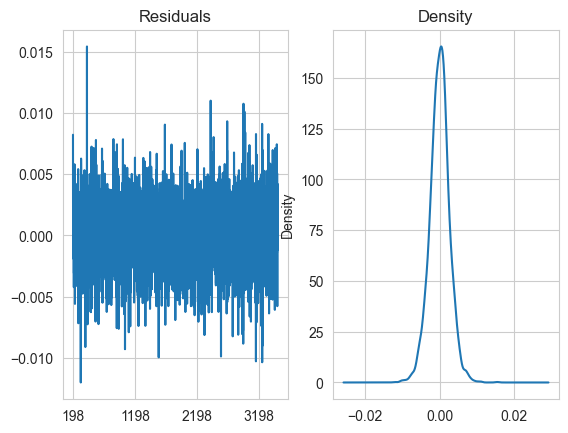

In [133]:
residuals= model_fit.resid[1:]
fig, ax= plt.subplots(1,2)
residuals.plot(title= "Residuals", ax= ax[0])
residuals.plot(title= "Density", kind= 'kde',  ax= ax[1])
plt.show()

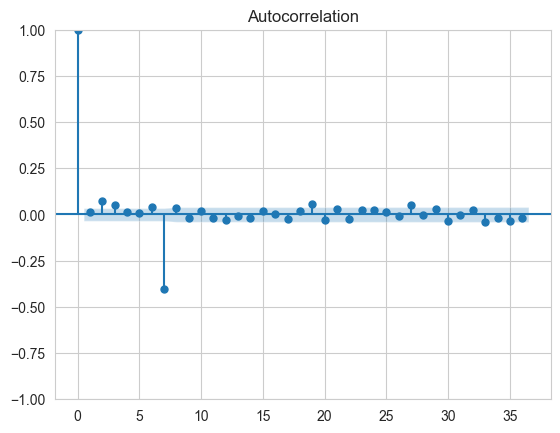

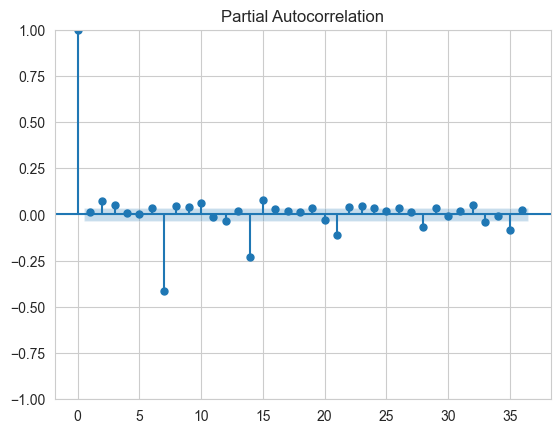

In [134]:
acf_residual= plot_acf(residuals)
pacf_residual= plot_pacf(residuals)

In [135]:
df3= pd.to_numeric(df3)

In [136]:
df3= df3.to_frame()

<Axes: >

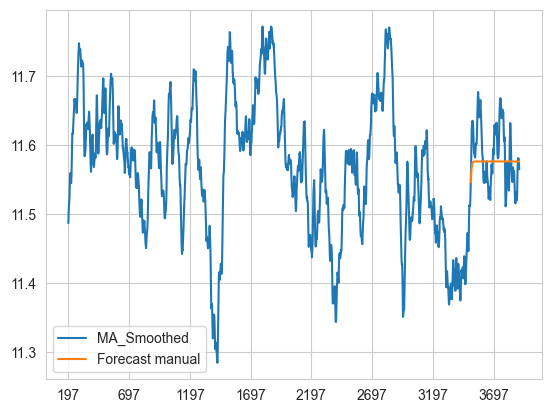

In [137]:
forecast_test = model_fit.forecast(steps=len(df3_test))
df3['Forecast manual']= [None]*len(df3_train)+ list(forecast_test)
df3.plot()

In [138]:
import pmdarima as pm
auto_arima= pm.auto_arima(df3_train, stepwise= False, seasonal= False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [140]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3311
Model:               SARIMAX(5, 1, 0)   Log Likelihood               15015.324
Date:                Sat, 08 Feb 2025   AIC                         -30016.648
Time:                        16:01:21   BIC                         -29973.915
Sample:                    01-01-1970   HQIC                        -30001.353
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.056e-06    4.5e-05      0.068      0.946   -8.52e-05    9.13e-05
ar.L1          0.8301      0.016     50.684      0.000       0.798       0.862
ar.L2          0.0733      0.023      3.213      0.001       0.029       0.118
ar.L3         -0.0039      0.022     -0.176      0.861      -0.048       0.040
ar.L4         -0.0334      0.023     -1.461      0.144      -0.078       0.011
ar.L5         -0.0790      0.018     -4.284      0.000      -0.115      -0.043
sigma2      6.718e-06   1.32e-07     51.020      0.000    6.46e-06    6.98e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               194.03
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

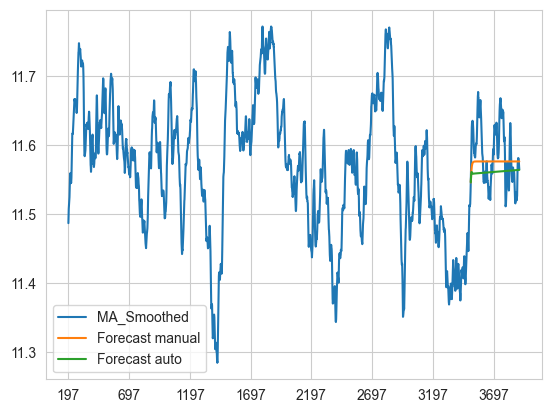

In [141]:
forecast_test_auto= auto_arima.predict(n_periods= len(df3_test))
df3['Forecast auto']= [None]*len(df3_train)+ list(forecast_test_auto)
df3.plot()

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

mae= mean_absolute_error(df3_test, forecast_test)
mape= mean_absolute_percentage_error(df3_test, forecast_test)
rmse= np.sqrt(mean_squared_error(df3_test, forecast_test))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

mae: 0.037024157967368174
mape: 0.0031910248088989346
rmse: 0.044544428504539144


In [147]:
mae= mean_absolute_error(df3_test, forecast_test_auto)
mape= mean_absolute_percentage_error(df3_test, forecast_test_auto)
rmse= np.sqrt(mean_squared_error(df3_test, forecast_test_auto))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

mae: 0.040391279427232564
mape: 0.0034778647509027356
rmse: 0.050837886879719504
